# Houses prices

In [104]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Data Preparation
Load and explore the data

In [105]:
# Uncomment to download the data

#!wget https://files.data.gouv.fr/geo-dvf/latest/csv/2023/departements/34.csv.gz
#!gunzip 34.csv.gz

In [125]:
prices_file = "34.csv"

In [126]:
prices_df = pd.read_csv(prices_file)
prices_df.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
0  2023-173854    2023-01-02                   1           Vente   
1  2023-173854    2023-01-02                   1           Vente   
2  2023-173855    2023-01-05                   1           Vente   
3  2023-173856    2023-01-03                   1           Vente   
4  2023-173857    2023-01-04                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  \
0         416850.0            84.0             NaN   
1         416850.0            84.0             NaN   
2         158730.0           101.0             NaN   
3          28000.0            31.0             NaN   
4         147000.0             3.0             NaN   

                adresse_nom_voie adresse_code_voie  code_postal  ...  \
0  RUE SAINTE TERESA DE CALCUTTA              1362      34170.0  ...   
1  RUE SAINTE TERESA DE CALCUTTA              1362      34170.0  ...   
2               AV PIERRE RACINE              0035      34280.0  ...   
3       BD JEAN MATHIEU GRANGENT              0853      34200.0  ...   
4                RTE DE LAVERUNE              3200      34070.0  ...   

    type_local surface_reelle_bati  nombre_pieces_principales  \
0   Dépendance                 NaN                        0.0   
1       Maison                85.0                        4.0   
2  Appartement                25.0                        1.0   
3   Dépendance                 NaN                        0.0   
4   Dépendance                 NaN                        0.0   

   code_nature_culture  nature_culture code_nature_culture_speciale  \
0                  NaN             NaN                          NaN   
1                  NaN             NaN                          NaN   
2                  NaN             NaN                          NaN   
3                  NaN             NaN                          NaN   
4                  NaN             NaN                          NaN   

   nature_culture_speciale  surface_terrain  longitude   latitude  
0                      NaN              NaN   3.917974  43.653590  
1                      NaN              NaN   3.917974  43.653590  
2                      NaN              NaN   4.086656  43.558880  
3                      NaN              NaN   3.666590  43.398524  
4                      NaN              NaN   3.858816  43.604228  

[5 rows x 40 columns]

In [164]:
prices_df.columns
prices_df.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
0  2023-173854    2023-01-02                   1           Vente   
1  2023-173854    2023-01-02                   1           Vente   
2  2023-173855    2023-01-05                   1           Vente   
3  2023-173856    2023-01-03                   1           Vente   
4  2023-173857    2023-01-04                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe  \
0         416850.0            84.0             NaN   
1         416850.0            84.0             NaN   
2         158730.0           101.0             NaN   
3          28000.0            31.0             NaN   
4         147000.0             3.0             NaN   

                adresse_nom_voie adresse_code_voie  code_postal  ...  \
0  RUE SAINTE TERESA DE CALCUTTA              1362      34170.0  ...   
1  RUE SAINTE TERESA DE CALCUTTA              1362      34170.0  ...   
2               AV PIERRE RACINE              0035      34280.0  ...   
3       BD JEAN MATHIEU GRANGENT              0853      34200.0  ...   
4                RTE DE LAVERUNE              3200      34070.0  ...   

    type_local surface_reelle_bati  nombre_pieces_principales  \
0   Dépendance                 NaN                        0.0   
1       Maison                85.0                        4.0   
2  Appartement                25.0                        1.0   
3   Dépendance                 NaN                        0.0   
4   Dépendance                 NaN                        0.0   

   code_nature_culture  nature_culture code_nature_culture_speciale  \
0                  NaN             NaN                          NaN   
1                  NaN             NaN                          NaN   
2                  NaN             NaN                          NaN   
3                  NaN             NaN                          NaN   
4                  NaN             NaN                          NaN   

   nature_culture_speciale  surface_terrain  longitude   latitude  
0                      NaN              NaN   3.917974  43.653590  
1                      NaN              NaN   3.917974  43.653590  
2                      NaN              NaN   4.086656  43.558880  
3                      NaN              NaN   3.666590  43.398524  
4                      NaN              NaN   3.858816  43.604228  

[5 rows x 40 columns]

In [128]:
# Retrieve only interesting columns from dataset

prices_df_clean = pd.DataFrame({"target":prices_df["valeur_fonciere"],
                                "lot1_surface_carrez":prices_df["lot1_surface_carrez"],
                                "nombre_pieces_principales":prices_df["nombre_pieces_principales"],
                                "type_local":prices_df["type_local"].astype(str),
                                "longitude":prices_df["longitude"],
                                "latitude":prices_df["latitude"],
                                })
prices_df_clean.head(10)

target  lot1_surface_carrez  nombre_pieces_principales   type_local  \
0  416850.0                  NaN                        0.0   Dépendance   
1  416850.0                86.42                        4.0       Maison   
2  158730.0                20.71                        1.0  Appartement   
3   28000.0                  NaN                        0.0   Dépendance   
4  147000.0                  NaN                        0.0   Dépendance   
5  147000.0                  NaN                        2.0  Appartement   
6  140000.0                  NaN                        2.0  Appartement   
7  140000.0                  NaN                        0.0   Dépendance   
8  163000.0                40.50                        0.0   Dépendance   
9  163000.0                40.50                        0.0   Dépendance   

   longitude   latitude  
0   3.917974  43.653590  
1   3.917974  43.653590  
2   4.086656  43.558880  
3   3.666590  43.398524  
4   3.858816  43.604228  
5   3.858816  43.604228  
6   3.876608  43.624243  
7   3.876608  43.624243  
8   3.889093  43.616551  
9   3.889093  43.616551

In [129]:
prices_df_clean.dtypes

target                       float64
lot1_surface_carrez          float64
nombre_pieces_principales    float64
type_local                    object
longitude                    float64
latitude                     float64
dtype: object

In [130]:
# Keep only Maison and Appartement types
prices_df_homes = prices_df_clean[((prices_df_clean.type_local == "Maison") | (prices_df_clean.type_local == "Appartement")) & (prices_df_clean.lot1_surface_carrez > 0)]
prices_df_homes.head(100)

target  lot1_surface_carrez  nombre_pieces_principales   type_local  \
1     416850.0                86.42                        4.0       Maison   
2     158730.0                20.71                        1.0  Appartement   
10    163000.0                40.50                        2.0  Appartement   
14     82000.0                21.58                        1.0  Appartement   
16     76000.0                30.25                        1.0  Appartement   
...        ...                  ...                        ...          ...   
1100  280000.0                42.85                        2.0  Appartement   
1108  168000.0                48.70                        2.0  Appartement   
1146  123750.0                24.16                        1.0  Appartement   
1158  155000.0                76.05                        4.0  Appartement   
1164  320760.0                73.53                        3.0  Appartement   

      longitude   latitude  
1      3.917974  43.653590  
2      4.086656  43.558880  
10     3.889093  43.616551  
14     3.891022  43.590893  
16     3.846555  43.619867  
...         ...        ...  
1100   4.090230  43.559121  
1108   3.829394  43.612241  
1146   3.976380  43.547022  
1158   3.867284  43.593990  
1164   3.842621  43.591855  

[100 rows x 6 columns]

##### Visualize some data correlation

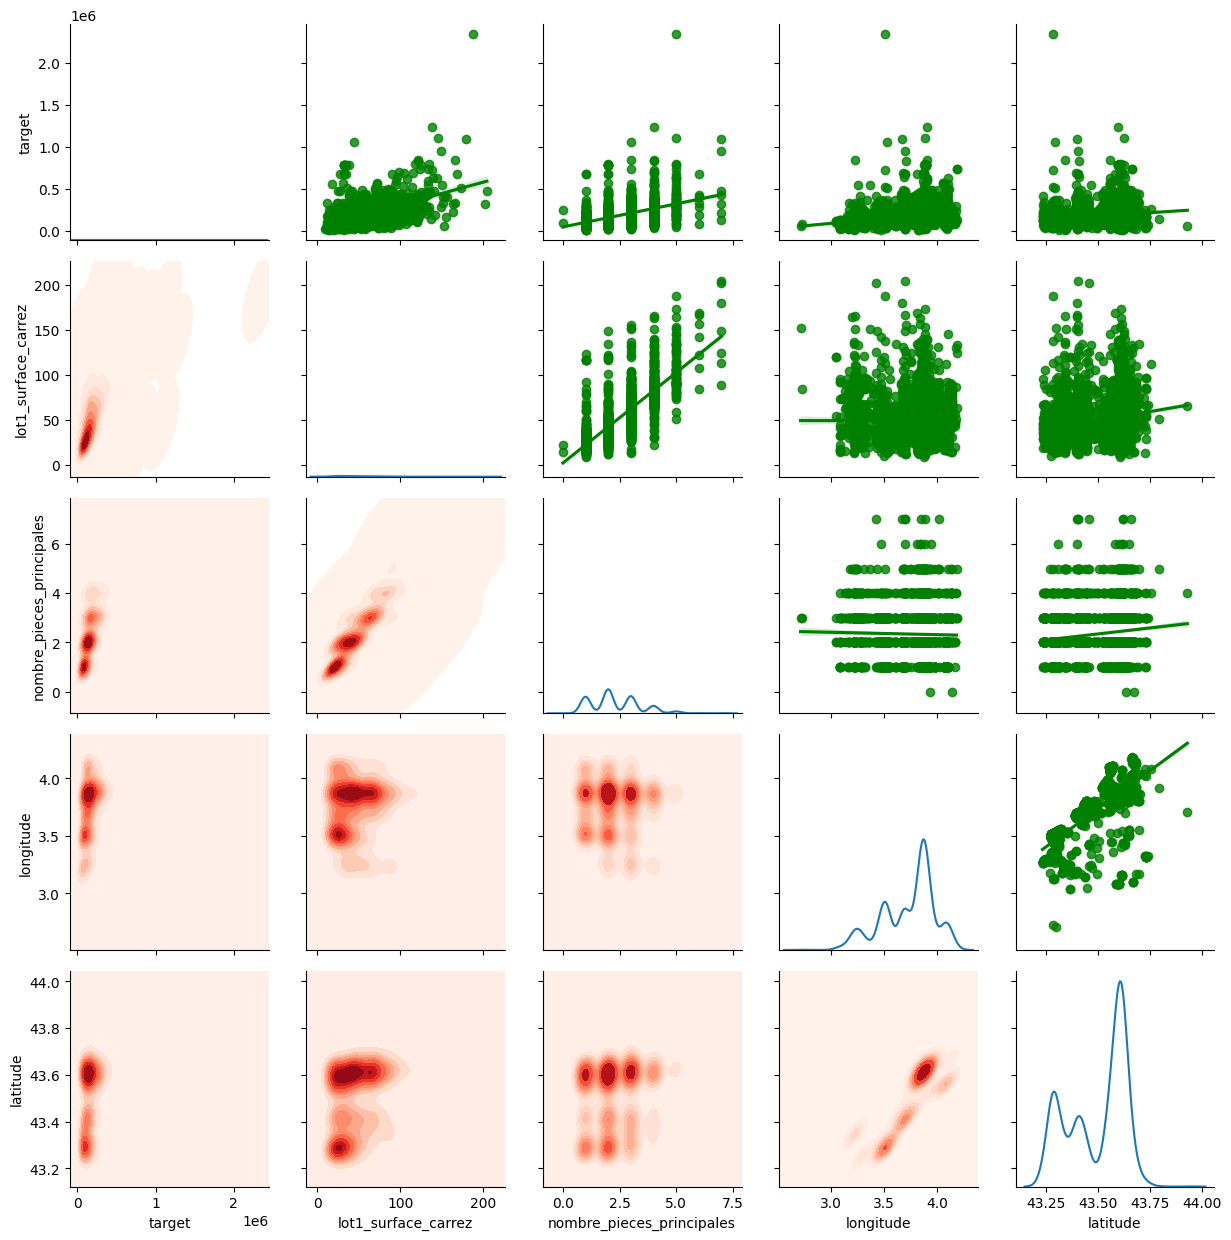

In [173]:
import seaborn as sns
attributes = ["target", "lot1_surface_carrez", "nombre_pieces_principales", "type_local", "longitude", "latitude"]
g = sns.PairGrid(prices_df_homes[attributes])
g = g.map_upper(sns.regplot, color="g")
g = g.map_lower(sns.kdeplot,cmap="Reds", fill=True, thresh=False)
g = g.map_diag(sns.kdeplot)

One hot encode the type of house

In [131]:
prices_df_homes_one_hot = pd.get_dummies(prices_df_homes, columns=["type_local"], dtype=int)
prices_df_homes_one_hot.head()

target  lot1_surface_carrez  nombre_pieces_principales  longitude  \
1   416850.0                86.42                        4.0   3.917974   
2   158730.0                20.71                        1.0   4.086656   
10  163000.0                40.50                        2.0   3.889093   
14   82000.0                21.58                        1.0   3.891022   
16   76000.0                30.25                        1.0   3.846555   

     latitude  type_local_Appartement  type_local_Maison  
1   43.653590                       0                  1  
2   43.558880                       1                  0  
10  43.616551                       1                  0  
14  43.590893                       1                  0  
16  43.619867                       1                  0

Create train and test samples and extract labels

In [132]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(prices_df_homes_one_hot, test_size=0.2, random_state=0)
y_train = train.pop('target')
x_train = train
y_test = test.pop('target')
x_test = test



Create tensorflow datasets

In [134]:
train_ds= tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))


In [135]:
for row in test_ds.take(3):
  print(row)


(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([44.08    ,  2.      ,  4.090637, 43.559671,  1.      ,  0.      ])>, <tf.Tensor: shape=(), dtype=float64, numpy=278000.0>)
(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([48.99    ,  2.      ,  3.925558, 43.643935,  1.      ,  0.      ])>, <tf.Tensor: shape=(), dtype=float64, numpy=158500.0>)
(<tf.Tensor: shape=(6,), dtype=float64, numpy=array([15.      ,  3.      ,  4.131393, 43.67689 ,  1.      ,  0.      ])>, <tf.Tensor: shape=(), dtype=float64, numpy=170000.0>)


## Train model



In [136]:
SHUFFLE_BUFFER = 500
BATCH_SIZE = 16

#### Normalize data
Normalize data so the learning with the DNN is faster.
Normalization is done unsing keras layer that normalize data to a mean of 0 and a variance of 1

In [137]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train)

In [138]:
norm = normalizer(x_train).numpy()

##### Comparing normalized and non-normalized data (latitude and longitude)

It seems that after normalization the latitude is at index 3 and longitude at index 2. Don't know why indexes order is not preserved.

Text(0, 0.5, 'counts')

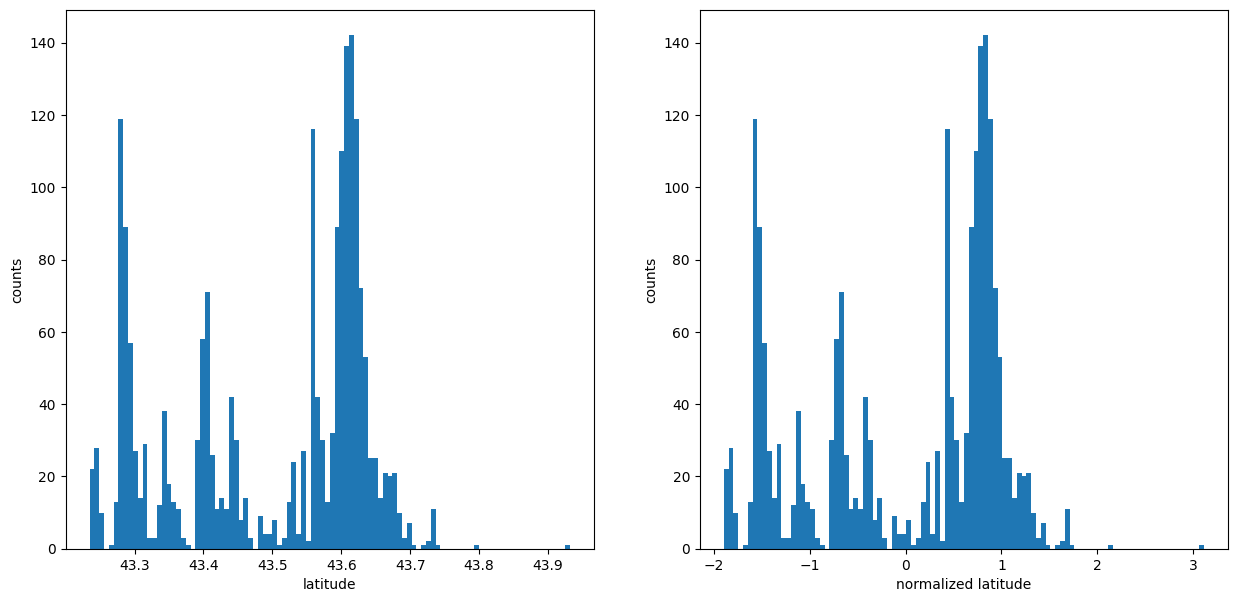

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
_=plt.hist(x_train['latitude'], bins=100)
plt.xlabel("latitude")
plt.ylabel("counts")
plt.subplot(1,2,2)
_=plt.hist(norm[:,3], bins=100)
plt.xlabel("normalized latitude")
plt.ylabel("counts")


Text(0, 0.5, 'counts')

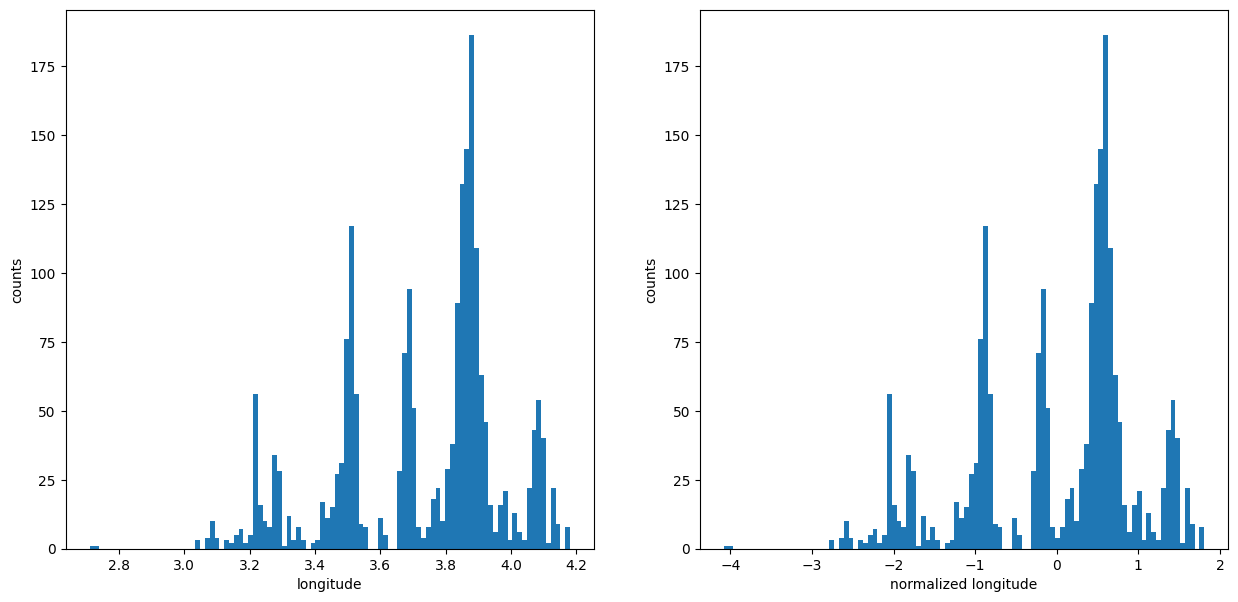

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
_ = plt.hist(x_train['longitude'], bins=100)
plt.xlabel("longitude")
plt.ylabel("counts")
plt.subplot(1,2,2)
_ = plt.hist(norm[:,2], bins=100)
plt.xlabel("normalized longitude")
plt.ylabel("counts")

Text(0, 0.5, 'normalized latitude')

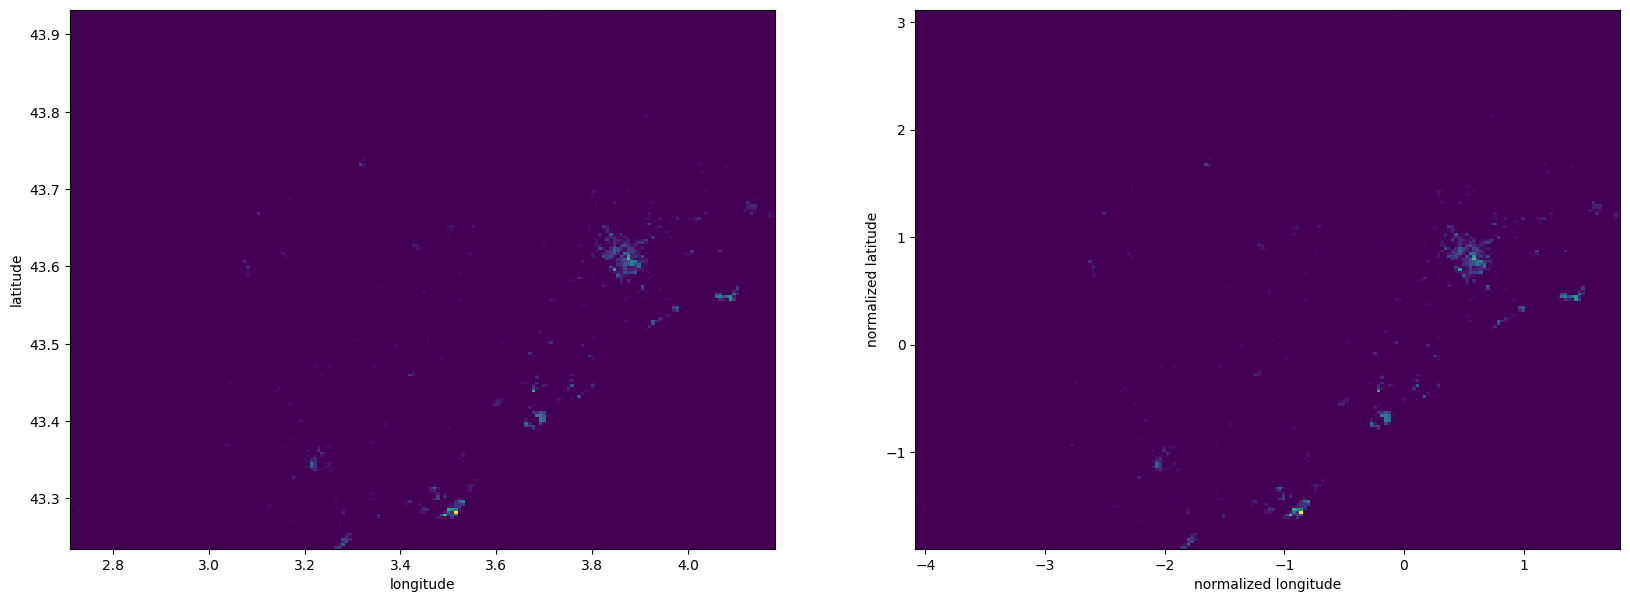

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
_ = plt.hist2d(x_train['longitude'], x_train['latitude'], bins=200)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.subplot(1,2,2)
_ = plt.hist2d(norm[:,2], norm[:,3], bins=200)
plt.xlabel("normalized longitude")
plt.ylabel("normalized latitude")

Text(0, 0.5, 'counts')

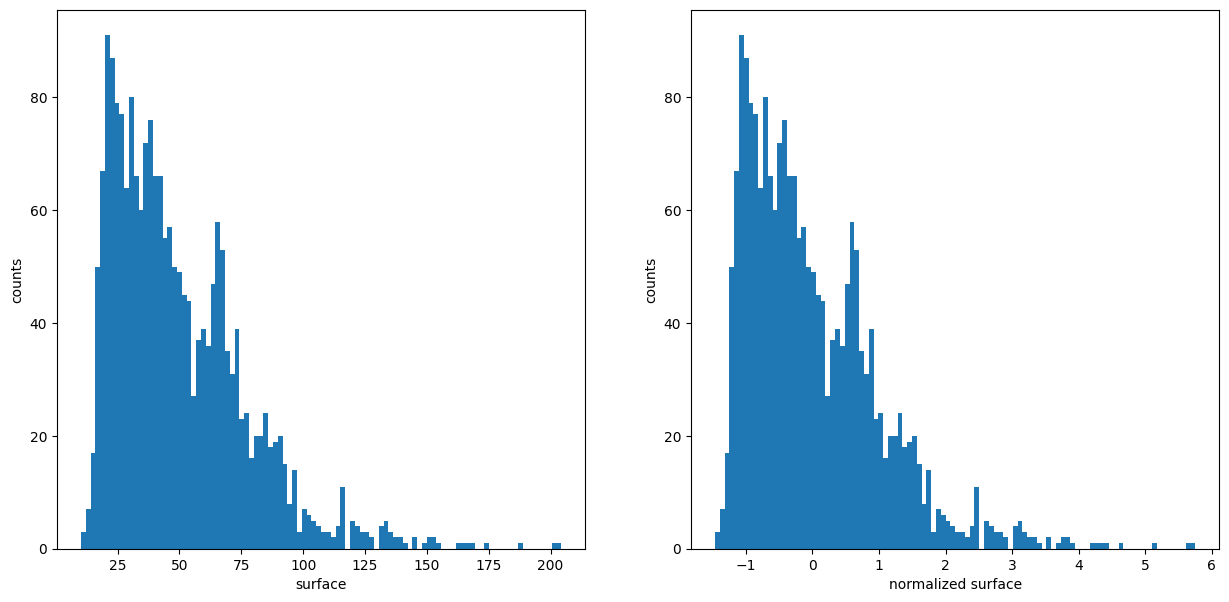

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
_ = plt.hist(x_train['lot1_surface_carrez'], bins=100)
plt.xlabel("surface")
plt.ylabel("counts")
plt.subplot(1,2,2)
_ = plt.hist(norm[:,0], bins=100)
plt.xlabel("normalized surface")
plt.ylabel("counts")

### First model
Test on a first model extracted from https://www.tensorflow.org/tutorials/load_data/pandas_dataframe#a_dataframe_as_an_array

In [143]:

from tensorflow.keras import layers
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss="mean_absolute_error",
                metrics=['mean_absolute_error'])
  return model


In [144]:
BATCH_SIZE=2
numeric_batches = train_ds.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
history = model.fit(numeric_batches, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1025/1025 [==============================] - 18s 12ms/step - loss: 177489.4844 - mean_absolute_error: 177489.4844 - val_loss: 180304.3281 - val_mean_absolute_error: 180304.3281
Epoch 2/30
1025/1025 [==============================] - 22s 22ms/step - loss: 176012.3125 - mean_absolute_error: 176012.3125 - val_loss: 177284.3750 - val_mean_absolute_error: 177284.3750
Epoch 3/30
1025/1025 [==============================] - 16s 16ms/step - loss: 171065.6094 - mean_absolute_error: 171065.6094 - val_loss: 170065.4062 - val_mean_absolute_error: 170065.4062
Epoch 4/30
1025/1025 [==============================] - 21s 21ms/step - loss: 161702.0781 - mean_absolute_error: 161702.0781 - val_loss: 158107.8906 - val_mean_absolute_error: 158107.8906
Epoch 5/30
1025/1025 [==============================] - 13s 13ms/step - loss: 147622.7344 - mean_absolute_error: 147622.7344 - val_loss: 141557.9375 - val_mean_absolute_error: 141557.9375
Epoch 6/30
1025/1025 [==============================] - 7s 7

In [145]:
model.evaluate(x_test, y_test)

17/17 [==============================] - 0s 6ms/step - loss: 68115.2266 - mean_absolute_error: 68115.2266


[68115.2265625, 68115.2265625]

In [146]:
import matplotlib.pyplot as plt
def plot_loss(history):
    hist = pd.DataFrame(history.history)
    plt.plot(history.epoch, hist['loss'], label="loss")
    plt.plot(history.epoch, hist['val_loss'], label="val_loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()


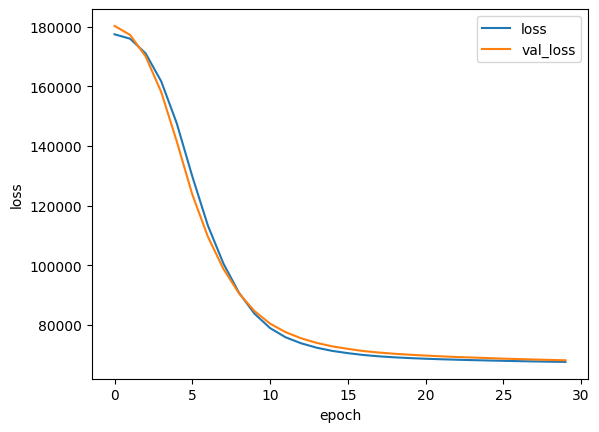

In [147]:
plot_loss(history)

#### Second model
Test on a second model from https://www.tensorflow.org/tutorials/keras/regression

In [148]:
from tensorflow.keras import layers
def get_basic_model2():
  model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss="mean_absolute_error",
                metrics=['mean_absolute_error'])
  return model

In [149]:
BATCH_SIZE=2
numeric_batches = train_ds.shuffle(1000).batch(BATCH_SIZE)

model_2 = get_basic_model()
history_2 = model_2.fit(numeric_batches, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1025/1025 [==============================] - 6s 2ms/step - loss: 177448.2188 - mean_absolute_error: 177448.2188 - val_loss: 180142.2500 - val_mean_absolute_error: 180142.2500
Epoch 2/30
1025/1025 [==============================] - 3s 3ms/step - loss: 175548.3906 - mean_absolute_error: 175548.3906 - val_loss: 176513.9531 - val_mean_absolute_error: 176513.9531
Epoch 3/30
1025/1025 [==============================] - 3s 3ms/step - loss: 169791.0781 - mean_absolute_error: 169791.0781 - val_loss: 168373.5000 - val_mean_absolute_error: 168373.5000
Epoch 4/30
1025/1025 [==============================] - 2s 2ms/step - loss: 159193.9844 - mean_absolute_error: 159193.9844 - val_loss: 155109.4219 - val_mean_absolute_error: 155109.4219
Epoch 5/30
1025/1025 [==============================] - 2s 2ms/step - loss: 143500.9844 - mean_absolute_error: 143500.9844 - val_loss: 137106.8125 - val_mean_absolute_error: 137106.8125
Epoch 6/30
1025/1025 [==============================] - 2s 2ms/step - 

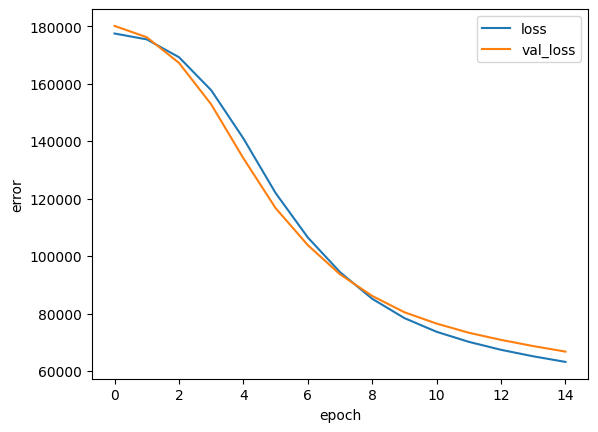

In [ ]:
plot_loss(history_2)